In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
pwd

'C:\\Users\\19713\\Desktop\\Springboard'

In [4]:
df = pd.read_json('C:\\Users\\19713\\Desktop\\Springboard\\logins.json')
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


This shows that we have one column of type "datetime64."

Step 1: Aggregate these login counts based on 15 minute time intervals.

In [7]:
df.set_index('login_time', inplace = True)

In [8]:
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [15]:
df.sort_index(inplace = True)
df['count'] = 1

In [16]:
df.head()

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [24]:
login_times_agg = df.resample("15min").sum()

In [26]:
login_times_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [27]:
login_times_agg['count'].sum() == df.shape[0]

True

Step 2: Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [28]:
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


The data goes from January 1st, 1970 to April 13th, 1970.

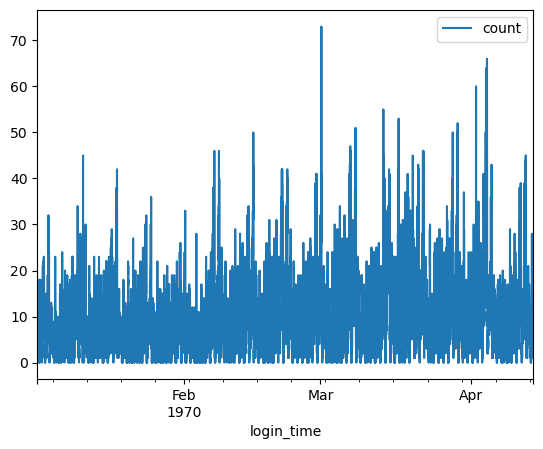

In [31]:
login_times_agg.plot()
plt.show()

It is difficult to see very much of what is going on this graph, other than that it appears as though login times increase with respect to a period. Let's try smoothing the graph out to get a better look at how the login times are rising.

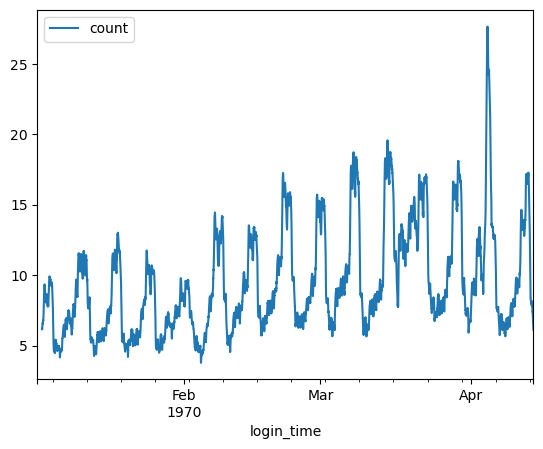

In [39]:
login_times_agg.rolling(window = 90).mean().plot()
plt.show()

We can see that the login times rises and falls on a weekly basis. Let us know turn our attention to data from only the month of February to see if we can again anymore insights about the underlying patterns in this data.

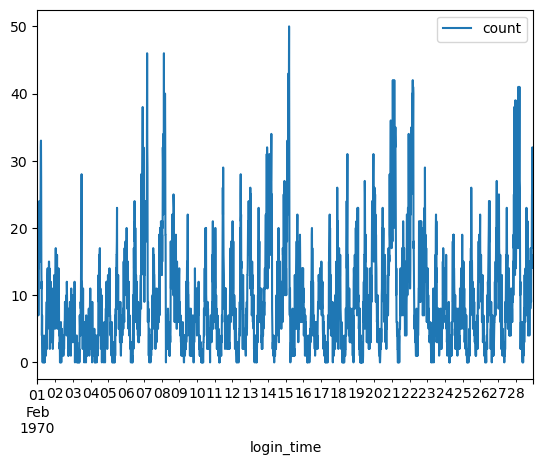

In [40]:
login_times_agg.loc['1970-02'].plot()
plt.show()

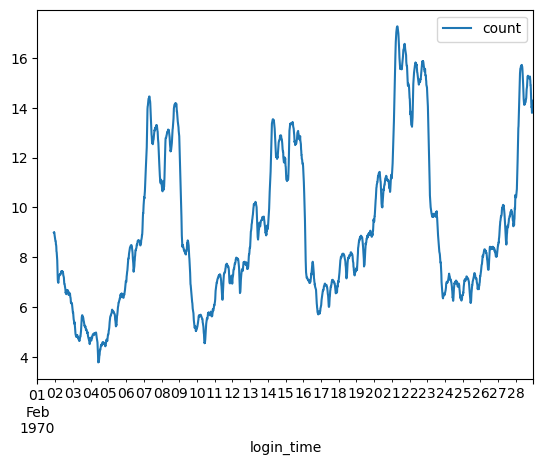

In [42]:
login_times_agg.loc['1970-02'].rolling(window = 90).mean().plot()
plt.show()

There are peaks in the number of login times on the 1st, 7th, 14th, 21st, and 28th. What days of the week do these dates correspond to?

In [43]:
datetime.datetime(1970, 2, 1).weekday()

6

Since pandas assumes the week starts on Monday (which is denoted by 0) and ends on a Sunday (which is denoted by 6), we see that Feb. 1st, 1970 was on a Sunday.

In [44]:
datetime.datetime(1970, 2, 7).weekday()

5

This shows that 02-01-1970 was on a Saturday, which further implies that the peaks of the number of login times occured during the weekend. This makes sense as people usually have more free time on the weekends and will therefore log in more often. To get an even better look at this trend, let's focus on just the first week of this month.

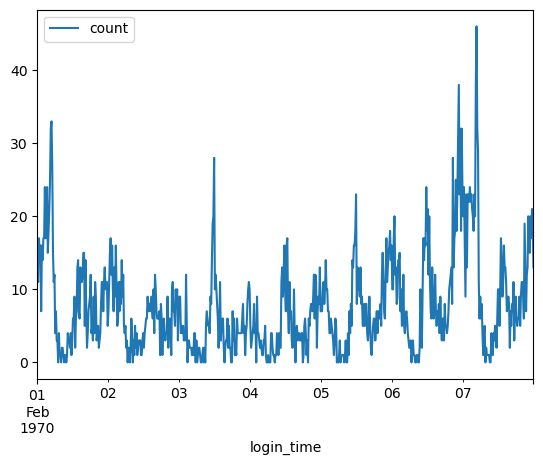

In [45]:
login_times_agg.loc['1970-02-01':'1970-02-07'].plot()
plt.show()

This confirms the trend that we observed earlier, that more people tend to log in during the weekends as opposed to the weekdays. Let's create a better version of the previous graph.

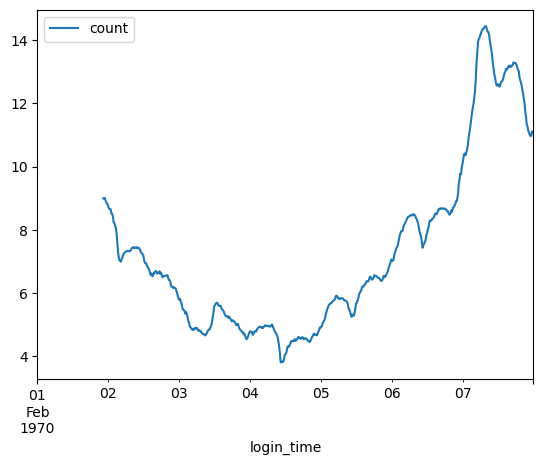

In [46]:
login_times_agg.loc['1970-02-01':'1970-02-07'].rolling(window = 90).mean().plot()
plt.show()

Let's get an even closer look at this graph and take at look at the weekend of Friday, February 6th, to Monday, February 9th.

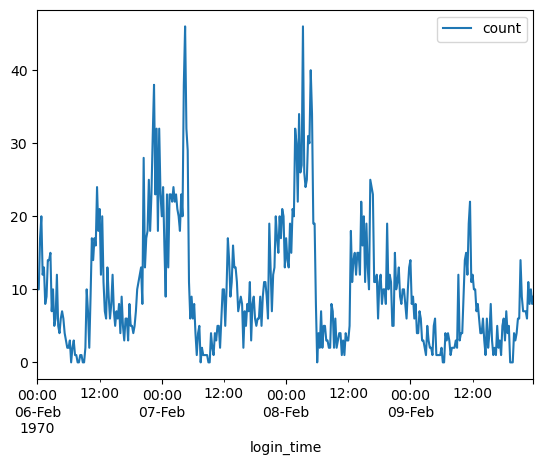

In [47]:
login_times_agg.loc['1970-02-06': '1970-02-09'].plot()
plt.show()

It appear as though demand is greatest around midnight on the weekends. Let's narrow our focus to just two weekdays.

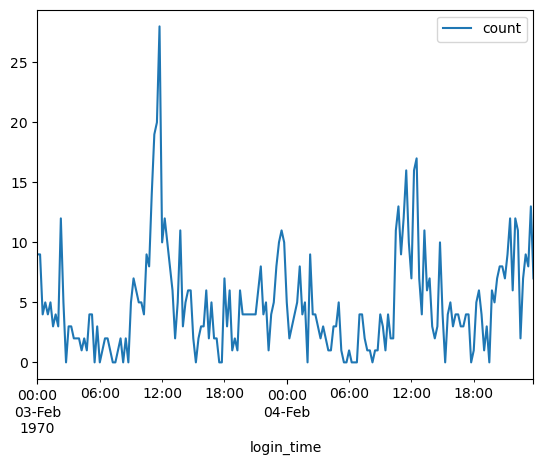

In [49]:
login_times_agg.loc['1970-02-03':'1970-02-04'].plot()
plt.show()

Demand is highest at noon and at midnight. Let's see if this trend continues for a different pair of weekdays in March.

In [50]:
datetime.datetime(1970, 3, 1).weekday()

6

March 1st was a Sunday, which means that we will take March 4th and 5th.

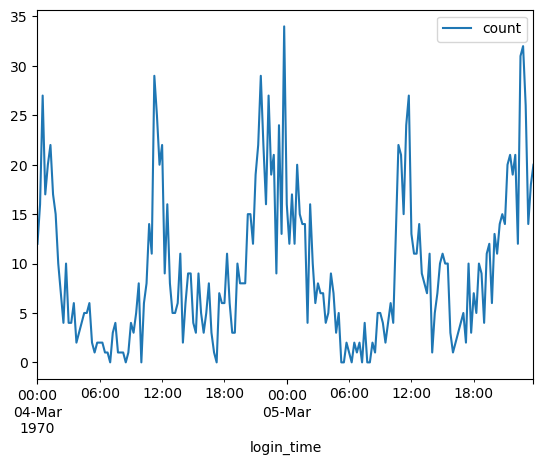

In [51]:
login_times_agg.loc['1970-03-04':'1970-03-05'].plot()
plt.show()

We observe the same pattern in that demand is at its highest at noon and midnight. There are two broad conclusions from our exploration:

1. Demand is higher on the weekends than during the week.
2. Demand is greatest around midnight and noon for both weekdays and weekends.